# Sklearn

## sklearn.linear_model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Линейная регрессия

#### Генерация данных

In [3]:
data, target, coef = datasets.make_regression(n_features = 2, n_informative = 1, n_targets = 1, 
                                              noise = 5., coef = True, random_state = 2)

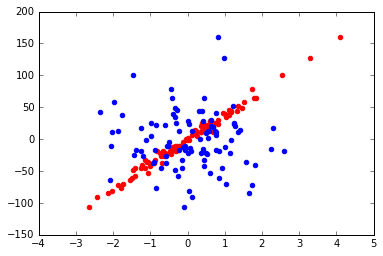

In [4]:
pylab.scatter(map(lambda x:x[0], data), target, color = 'r')
pylab.scatter(map(lambda x:x[1], data), target, color = 'b')

In [5]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(data, target,  
                                                                                     test_size = 0.3)

#### LinearRegression

In [6]:
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(train_data, train_labels)
predictions = linear_regressor.predict(test_data)

In [7]:
print test_labels

[  12.74038341 -105.77758163  -45.27502383  -52.37232463   64.19559505
   24.47584129  -21.47606913   25.7124082    -0.74051877  -14.97110322
  -35.32062686   21.20540389  -36.69728864  -76.75213382  -80.80239408
   29.8208999    38.36241814  -24.77820218    5.86887774   -1.42235396
  -42.44469577   10.33267887   12.42286854   11.96165156  -57.46293828
   18.17188553  -37.31870104  -16.65927231   12.47089016  -45.38589148]


In [8]:
print predictions

[   8.3894759  -100.5090125   -47.43092667  -40.04919496   69.54841119
   23.25153111  -17.37893333   28.6237692     1.74720333  -12.14446298
  -41.53344928   16.46163019  -26.26869527  -67.70214296  -77.08788421
   31.4766256    42.17722334  -25.45229894    4.8069398    -0.66080057
  -38.55108821    9.2323946     6.9202852    13.89642644  -53.55513564
   19.21071411  -33.99162603  -13.62846251   19.92411017  -42.76759311]


In [9]:
metrics.mean_absolute_error(test_labels, predictions)

3.9641196090641282

In [10]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring = 'mean_absolute_error', 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: -4.07007149878, std: 1.07371044929


In [11]:
scorer = metrics.make_scorer(metrics.mean_absolute_error, greater_is_better = True)

In [12]:
linear_scoring = cross_validation.cross_val_score(linear_regressor, data, target, scoring=scorer, 
                                                  cv = 10)
print 'mean: {}, std: {}'.format(linear_scoring.mean(), linear_scoring.std())

mean: 4.07007149878, std: 1.07371044929


In [13]:
coef

array([ 38.07925837,   0.        ])

In [14]:
linear_regressor.coef_

array([ 37.84020365,  -0.04895182])

In [15]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [16]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(linear_regressor.coef_[0], linear_regressor.coef_[1])

y = 37.84*x1 + -0.05*x2


#### Lasso

In [17]:
lasso_regressor = linear_model.Lasso(random_state = 3)
lasso_regressor.fit(train_data, train_labels)
lasso_predictions = lasso_regressor.predict(test_data)

In [18]:
lasso_scoring = cross_validation.cross_val_score(lasso_regressor, data, target, scoring = scorer, cv = 10)
print 'mean: {}, std: {}'.format(lasso_scoring.mean(), lasso_scoring.std())

mean: 4.15447824667, std: 1.0170354385


In [19]:
print lasso_regressor.coef_

[ 37.11295785  -0.        ]


In [20]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(coef[0], coef[1])

y = 38.08*x1 + 0.00*x2


In [21]:
print "y = {:.2f}*x1 + {:.2f}*x2".format(lasso_regressor.coef_[0], lasso_regressor.coef_[1])

y = 37.11*x1 + -0.00*x2
